In [1]:
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import matplotlib_inline
# %config InlineBackend.figure_format='retina'


# load data

In [159]:
t2m_era5 = xr.open_mfdataset('/data0/samuelb/como2024/ERA5/T2m/balkans/ERA5_????_T2m_*.nc').var167
t2m_mpi = xr.open_mfdataset('/data0/samuelb/como2024/MPI-ESM1-2-HR/tas/balkans/*_historical_*.nc').tas
sm_land_era5 = xr.open_mfdataset('/data0/samuelb/como2024/ERA5/swvl1_land/balkans/ERAland_????_swvl1_*.nc').var39
sm_era5 = xr.open_mfdataset('/data0/samuelb/como2024/ERA5/swvl1/balkans/ERA5_????_swvl1_*.nc').var39
sm_mpi = xr.open_mfdataset('/data0/samuelb/como2024/MPI-ESM1-2-HR/mrsos/*_balkans_*_historical_*.nc').mrsos


In [163]:
landmask = sm_land_era5.isel(time=0)!=9.96921e+36
t2m_era5 = t2m_era5.where(landmask)
sm_era5 = sm_era5.where(landmask)
sm_land_era5 = sm_land_era5.where(landmask)
sm_mpi = sm_mpi.where(sm_mpi!=9.96921e+36)/100


In [198]:
t2m_era5_summer = t2m_era5.where((t2m_era5.time.dt.month==6) | (t2m_era5.time.dt.month==7) | (t2m_era5.time.dt.month==8))
sm_land_era5_summer = sm_land_era5.where((sm_era5.time.dt.month==6) | (sm_land_era5.time.dt.month==7) | (sm_land_era5.time.dt.month==8))


# calculate hot / dry days

In [167]:
t2m_era5_summer_95p_rel = t2m_era5_summer.chunk({'time':-1}).groupby('time.dayofyear').quantile(.95)
t2m_era5_summer_95p = t2m_era5_summer.chunk({'time':-1}).quantile(.95)


In [199]:
sm_land_era5_summer_95p_rel = sm_land_era5_summer.chunk({'time':-1}).groupby('time.dayofyear').quantile(.95)
sm_land_era5_summer_95p = sm_land_era5_summer.chunk({'time':-1}).quantile(.95)


In [168]:
t2m_era5_summer_exceed_rel = t2m_era5_summer.groupby('time.dayofyear') > t2m_era5_summer_95p_rel
t2m_era5_summer_exceed = t2m_era5_summer > t2m_era5_summer_95p


/home/samuelb/.conda/envs/como2024/lib/python3.9/site-packages/xarray/core/indexing.py:1621: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]


In [200]:
sm_land_era5_summer_exceed_rel = sm_land_era5_summer.groupby('time.dayofyear') > sm_land_era5_summer_95p_rel
sm_land_era5_summer_exceed = sm_land_era5_summer > sm_land_era5_summer_95p


/home/samuelb/.conda/envs/como2024/lib/python3.9/site-packages/xarray/core/indexing.py:1621: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]


In [182]:
hot_days_rel_monthly = t2m_era5_summer_exceed_rel.resample(time='1M').sum()
hot_days_monthly = t2m_era5_summer_exceed.resample(time='1M').sum()


/home/samuelb/.conda/envs/como2024/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/samuelb/.conda/envs/como2024/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


# Plotting

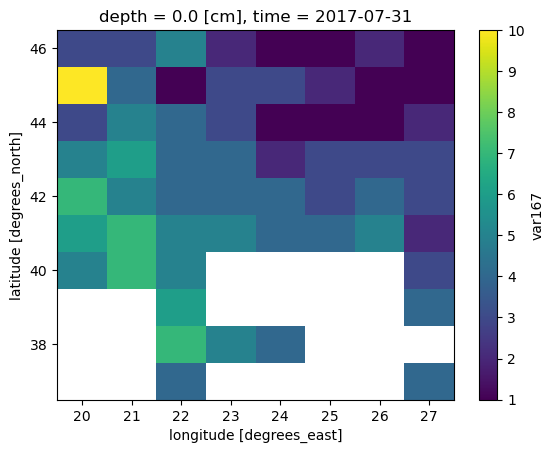

In [189]:
hot_days_rel_monthly.sel(time='2017-07').where(landmask).plot()


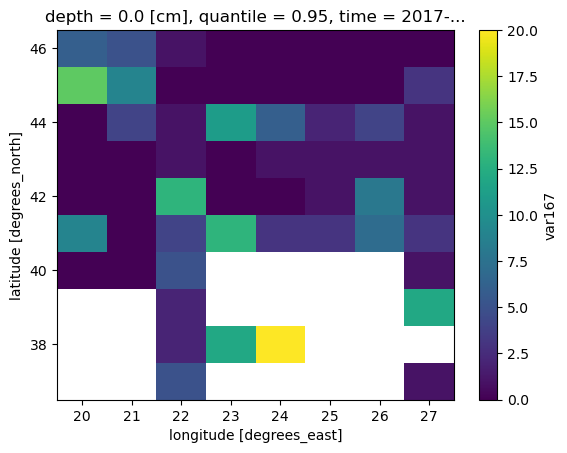

In [188]:
hot_days_monthly.sel(time='2017-07').where(landmask).plot()


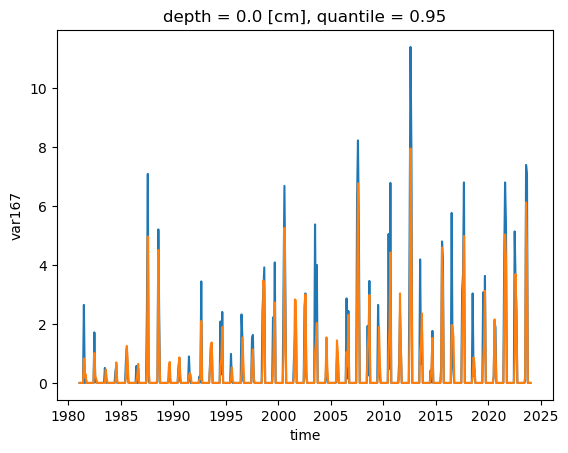

In [194]:
hot_days_rel_monthly.where(landmask).mean(('lat','lon')).plot()
hot_days_monthly.where(landmask).mean(('lat','lon')).plot()
